In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/CSCI_5541_project')

In [ ]:
!ls

 data				  nghe_an.parquet		   phowhisper_testing.ipynb
 dialect_to_standard_viet.ipynb  'nghe_an_transcription (1).csv'   saigon.parquet
 hanoi.parquet			  nghe_an_transcription.csv	   saigon_transcription.csv
 hanoi_transcription.csv	  nghe_an_transcription.parquet    saigon_transcription.gsheet
 hanoi_transcription.parquet	  nghe_an_wer.csv		   saigon_transcription.parquet
 hue.parquet			  nghe_an_wer.gsheet		   train_parquet.jsonl
 hue_transcription.csv		  phogpt.ipynb			   transcription_evaluation.ipynb
 hue_transcription.parquet	  phowhisper_testing_all.ipynb


In [ ]:
# import pandas as pd

# nghe_an_df = pd.read_csv("nghe_an_transcription.csv")
# hue_df = pd.read_csv("hue_transcription.csv")
# ha_noi_df = pd.read_csv("hanoi_transcription.csv")
# sai_gon_df = pd.read_csv("sai_gon_transcription.csv")


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.3 MB/s eta 0:00:00


In [ ]:
from jiwer import Compose, ToLowerCase, RemovePunctuation, RemoveMultipleSpaces, wer
import pandas as pd

# Preprocessing chain
transformation = Compose([
    ToLowerCase(),
    RemovePunctuation(),
    RemoveMultipleSpaces()
])
df_store = dict()
files = ['nghe_an_transcription', 'hue_transcription', 'hanoi_transcription', 'saigon_transcription']
wers = {}

for file in files:
    df = pd.read_csv(f"{file}.csv")
    # Extract hypothesis from dict
    df['hypothesis'] = df['pho_transcription'].apply(lambda x: eval(x)['text'] if isinstance(x, str) else x.get('text'))

    # Drop missing rows

    # Apply transformations to preview filtered version
    df['ref_clean'] = df['text'].apply(transformation)
    df['hyp_clean'] = df['hypothesis'].apply(transformation)

    # Compute WER
    df['wer'] = df.apply(
        lambda row: wer(row['ref_clean'], row['hyp_clean']),
        axis=1
    )
    # Save average WER
    wers[file] = df['wer'].mean()
    df.drop(columns=['text', 'speakerID', 'gender', 'audio', 'pho_transcription', 'hypothesis'], inplace=True)
    df_store[file[:-14]] = df

# Print results
for region, score in wers.items():
    print(f"{region}: {score:.4f}")


nghe_an_transcription: 0.1285
hue_transcription: 0.1567
hanoi_transcription: 0.1141
saigon_transcription: 0.1105


In [ ]:
df_store['hue'].to_csv('hue_wer.csv', index=False)

NameError: name 'df_store' is not defined

In [ ]:
    # print(f"\n📘 Top 5 Best (Lowest WER) - {file}")
    # best_samples = df.sort_values('wer').head(5)
    # for i, row in best_samples.iterrows():
    #     print(f"\nWER: {row['wer']:.4f}")
    #     print(f"REF: {row['text']}")
    #     print(f"HYP: {row['hypothesis']}")

    # print(f"\n📕 Top 5 Worst (Highest WER) - {file}")
    # worst_samples = df.sort_values('wer', ascending=False).head(10)
    # for i, row in worst_samples.iterrows():
    #     print(f"\nWER: {row['wer']:.4f}")
    #     print(f"REF: {row['text']}")
    #     print(f"HYP: {row['hypothesis']}")



📘 Top 5 Best (Lowest WER) - saigon_transcription

WER: 0.0000


KeyError: 'text'

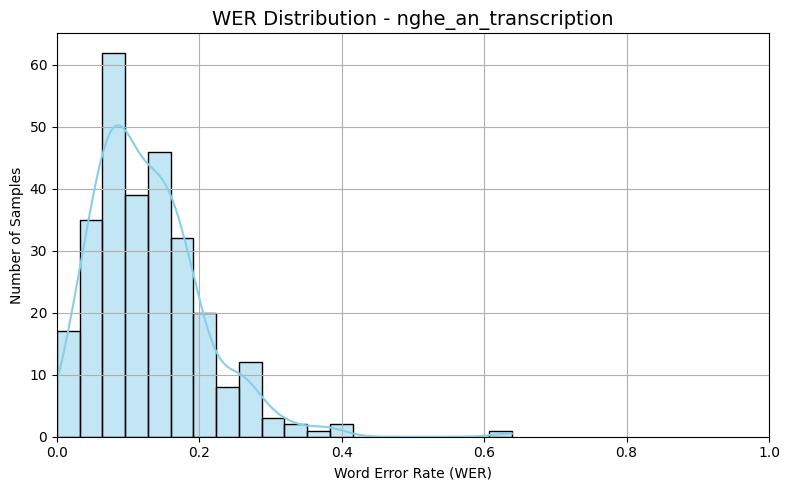

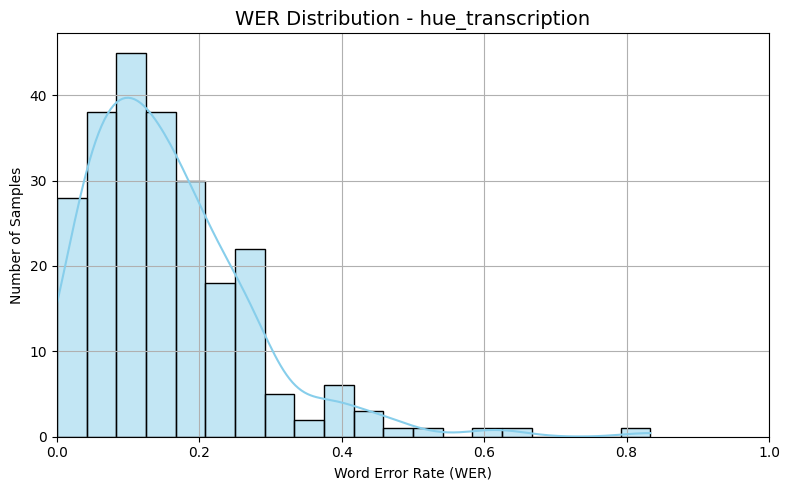

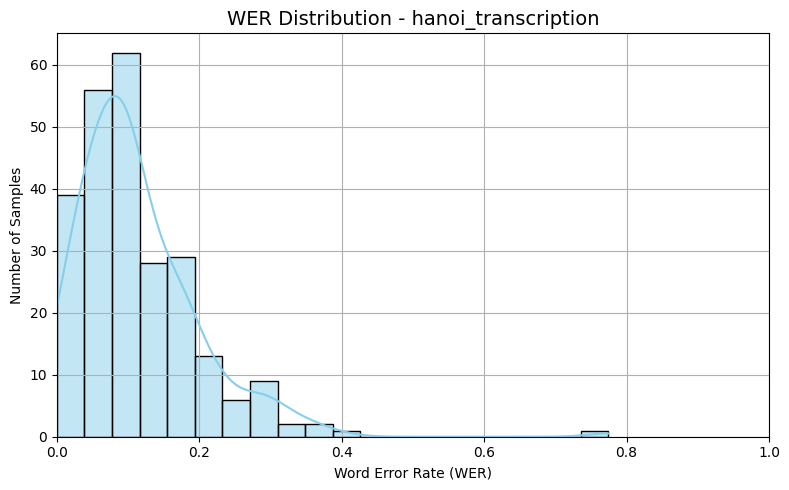

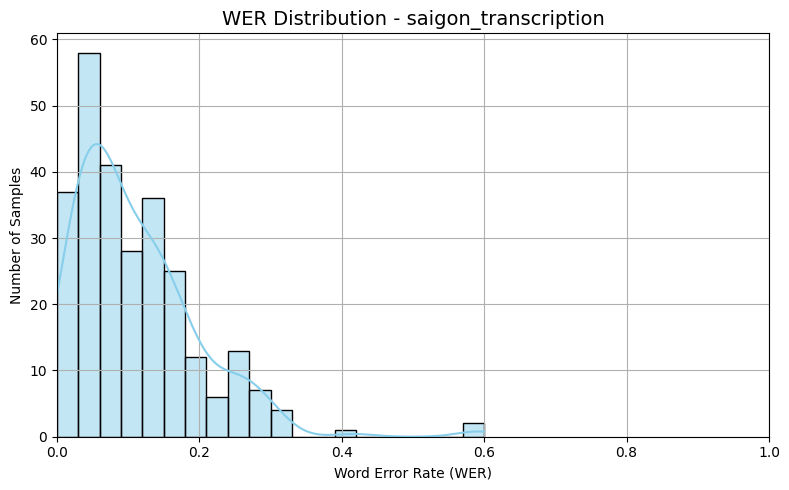

nghe_an_transcription: 0.1285
hue_transcription: 0.1567
hanoi_transcription: 0.1141
saigon_transcription: 0.1105


In [ ]:
from jiwer import Compose, ToLowerCase, RemovePunctuation, RemoveMultipleSpaces, wer
import pandas as pd

# Preprocessing chain
transformation = Compose([
    ToLowerCase(),
    RemovePunctuation(),
    RemoveMultipleSpaces()
])

df_store = dict()
files = ['nghe_an_transcription', 'hue_transcription', 'hanoi_transcription', 'saigon_transcription']
wers = {}

for file in files:
    df = pd.read_csv(f"{file}.csv")

    # Extract hypothesis from dict
    df['hypothesis'] = df['pho_transcription'].apply(lambda x: eval(x)['text'] if isinstance(x, str) else x.get('text'))

    # Clean
    df['ref_clean'] = df['text'].apply(transformation)
    df['hyp_clean'] = df['hypothesis'].apply(transformation)

    # Compute WER
    df['wer'] = df.apply(
        lambda row: wer(row['ref_clean'], row['hyp_clean']),
        axis=1
    )

    # ⬇️ WER plot right here
    plt.figure(figsize=(8, 5))
    sns.histplot(df['wer'], bins=20, kde=True, color="skyblue")
    plt.title(f"WER Distribution - {file}", fontsize=14)
    plt.xlabel("Word Error Rate (WER)")
    plt.ylabel("Number of Samples")
    plt.xlim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Store the full dataframe for inspection later (before dropping columns)
    df_store[file[:-14]] = df.copy()

    # Drop unused columns if needed later
    df.drop(columns=['text', 'speakerID', 'gender', 'audio', 'pho_transcription', 'hypothesis'], inplace=True)

    # Save average WER
    wers[file] = df['wer'].mean()

# Print average WERs
for region, score in wers.items():
    print(f"{region}: {score:.4f}")


In [ ]:
for region, df in df_store.items():
    print(f"\n📘 Top 5 Best (Lowest WER) - {region}")
    best_samples = df.sort_values('wer').head(5)
    for i, row in best_samples.iterrows():
        print(f"\nWER: {row['wer']:.4f}")
        print(f"REF: {row['text']}")
        print(f"HYP: {row['hypothesis']}")

    print(f"\n📕 Top 5 Worst (Highest WER) - {region}")
    worst_samples = df.sort_values('wer', ascending=False).head(5)
    for i, row in worst_samples.iterrows():
        print(f"\nWER: {row['wer']:.4f}")
        print(f"REF: {row['text']}")
        print(f"HYP: {row['hypothesis']}")



📘 Top 5 Best (Lowest WER) - nghe_an

WER: 0.0000
REF: Khi mà có cái ý tưởng để mở cái cửa hàng thực phẩm sạch thì cái mục tiêu lớn nhất đó là tìm những cái sản phẩm mà có cái nguồn gốc xuất xứ rõ ràng, làm việc trực tiếp, tận nguồn với nhà sản xuất và đồng thời là những cái mặt hàng đó phải đảm bảo chất lượng là thực sạch.
HYP: khi mà có cái ý tưởng để mở cái cửa hàng thực phẩm sạch thì cái mục tiêu lớn nhất đó là tìm những cái sản phẩm mà có cái nguồn gốc xuất xứ rõ ràng làm việc trực tiếp tận nguồn với nhà sản xuất và đồng thời là những cái mặt hàng đó phải đảm bảo chất lượng là thực sạch.

WER: 0.0115
REF: Thì quy định cái thời gian là mùa, ví dụ như mùa hè là từ mười tám giờ ba mươi cho đến hai hai giờ Thì có nghĩa là bà con nhân dân người ta vẫn có quyền trong cái khung giờ đó người ta vẫn đang còn có quyền để đưa rác ra Ví dụ như một số cán bộ Công nhân viên chức của nhà nước đi làm về và đặc biệt các cái lao động tự do, người ta đi làm về rất muộn.
HYP: thì quy định cái thời gi

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Optional: inline plotting for Jupyter/Colab
# %matplotlib inline

# # Plot WER distributions for each region
# for file in files:
#     df = pd.read_csv(f"{file}_evaluated.csv")  # Load the evaluated file

#     plt.figure(figsize=(8, 5))
#     sns.histplot(df['wer'], bins=20, kde=True, color="skyblue")
#     plt.title(f"WER Distribution - {file}", fontsize=14)
#     plt.xlabel("Word Error Rate (WER)")
#     plt.ylabel("Number of Samples")
#     plt.xlim(0, 1)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'nghe_an_transcription_evaluated.csv'

In [ ]:
for region, df in df_store.items():
    df.to_csv(f"{region}_wer.csv", index=False)